# Data Exploration: *Alphabetical Guide to Spain*
List accompanied Thomas Matthews' Spain tasting report in *Wine Spectator* (October 15, 2020)
[Link](https://www.winespectator.com/articles/alphabetical-guide-to-spain-101520) to *Alphabetical Guide to Spain*

## File Setup

In [1]:
# import and initialize main python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for file navigation
import os
import shutil
import glob
from pandas_ods_reader import read_ods

# import other packages
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
from patsy import dmatrices

# import geo packages
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

In [2]:
# initialize vizualization set
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

# Jupyter Notebook
%matplotlib inline

## Dataframe exploration
Import dataframes containing wine data and geographic data on Spanish wine regions.

In [3]:
# w = wine, g = geo
# Note: save CSV files in UTF-8 format to preserve special Spanish-language characters

df_w = pd.read_csv('./Alphabetical Guide to Spain - List Upload.csv')
df_g = pd.read_csv('./Alphabetical Guide to Spain - Geo.csv')

In [4]:
df_w.shape

(598, 59)

In [5]:
df_g.shape

(40, 5)

In [6]:
df_w.sample(10)

,Winery,Wine,Score,Price,Wine_Style,Denominación_de_Origen_DO,Geographical_Indication,Year,Rioja_Style,cat_Airén,...,cat_Tempranillo,cat_Tintilla_de_Rota,cat_Tinto_Velasco,cat_Treixadura,cat_Verdejo,cat_Vermell,cat_Vijiriega,cat_Viognier,cat_Viura|Macabeo,cat_Xarel-lo
549,BODEGAS VALDUERO,Ribera del Duero 2016,92,35.0,Red,Ribera del Duero,Castilla y León,2016,NaN,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,BODEGAS HNOS. PÉREZ PASCUAS,Ribera del Duero El Pedrosal Reserva 2006,91,30.0,Red,Ribera del Duero,Castilla y León,2006,Reserva,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,BODEGAS CASTILLO DE MONJARDIN,Garnacha Navarra La Cantera 2018,89,12.0,Red,Navarra,Navarra,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,BODEGAS VERDEAL,Verdejo Rueda Ayre 2018,87,14.0,White,Rueda,Castilla y León,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,Verdejo,NaN,NaN,NaN,NaN,NaN
37,BODEGAS BERCEO,Tempranillo Rioja 2018,84,12.0,Red,Rioja,Multi-Regional,2018,Rioja,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,BODEGAS BORSAO,Garnacha Campo de Borja 2018,87,9.0,Red,Campo de Borja,Aragon,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521,BODEGAS Y VIÑEDOS MARQUÉS DE TOMARES,Rioja Monteleiva Gran Reserva 2010,92,25.0,Red,Rioja,Multi-Regional,2010,Gran Reserva,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,BODEGAS CASTILLO DE CUZCURRITA,Rioja Cerrado del Castillo 2015,92,68.0,Red,Rioja,Multi-Regional,2015,Rioja,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,BODEGA OTAZU,Chardonnay Pago de Otazu Crianza 2016,89,34.0,White,Navarra,Navarra,2016,Crianza,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317,BODEGAS Y VIÑEDOS DÍEZ MÉRITO,Manzanilla Sanlúcar de Barrameda Victoria Sele...,89,14.0,Sherry,Manzanilla,Andalucia,NV,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_g.sample(10)

,Denominación_de_Origen_DO,Denominacion_or_GeoIndicator,Latitude,Longitude,Unnamed: 4
28,Terra Alta,Denominación_de_Origen_DO,41.050000,0.433333,https://geohack.toolforge.org/geohack.php?page...
5,Campo de Borja,Denominación_de_Origen_DO,41.816667,-1.533333,https://geohack.toolforge.org/geohack.php?page...
13,La Mancha,Denominación_de_Origen_DO,39.405556,-3.205556,https://geohack.toolforge.org/geohack.php?page...
31,Valdeorras,Denominación_de_Origen_DO,42.388889,-7.047222,https://geohack.toolforge.org/geohack.php?page...
24,Ribera del Duero,Denominación_de_Origen_DO,41.683333,-3.683333,https://geohack.toolforge.org/geohack.php?page...
12,Jumilla,Denominación_de_Origen_DO,38.783333,-1.316667,https://geohack.toolforge.org/geohack.php?page...
36,Castilla,Geographical_Indication,39.866667,-4.016667,https://geohack.toolforge.org/geohack.php?page...
32,Valencia,Denominación_de_Origen_DO,39.466667,-0.375000,https://geohack.toolforge.org/geohack.php?page...
33,Yecla,Denominación_de_Origen_DO,38.616700,-1.116700,https://geohack.toolforge.org/geohack.php?page...
20,Priorat,Denominación_de_Origen_DO,41.133333,0.816667,https://geohack.toolforge.org/geohack.php?page...


## Eliminate Outliers
See analysis performed in *Guide to Spain - Hypothesis Test* Jupyter notebook. Exclude two wines with extreme prices:
* Ribera del Duero Unico 2010, Score = 96, Price = 540
* Ribera del Duero Unico Reserva Especial NV, Score = 95, Price = 700

In [13]:
df_w_trim = df_w[
    (df_w.Score > 0) & 
    (df_w.Price > 0) &
    (df_w.Price < 540)
]

df_w_trim.shape

(591, 59)

## Differentiate Table Wine from Mainstream Quality Wine
I include wine labeled Viño de la Tierra, Vi de la Terra (Mallorca), and Vino de España in this definition.

In [14]:
# Identify those columns that start with 'cat_' identifier. 
# Create a new column that concatenates those columns where value is not 'None'.

# Split table wine into temp df
df_w_trim_table = df_w_trim[
    (df_w_trim['Denominación_de_Origen_DO'] == 'Viño de la Tierra ') | 
    (df_w_trim['Denominación_de_Origen_DO'] == 'Vi de la Terra') |
    (df_w_trim['Denominación_de_Origen_DO'] == 'Vino de España')
]

df_w_trim_table['Wine_Quality'] = 'Table Wine'
     
# Split mainstream wine into temp df 
     
df_w_trim_main = df_w_trim[
    (df_w_trim['Denominación_de_Origen_DO'] != 'Viño de la Tierra ') | 
    (df_w_trim['Denominación_de_Origen_DO'] != 'Vi de la Terra') |
    (df_w_trim['Denominación_de_Origen_DO'] != 'Vino de España')
]

df_w_trim_main['Wine_Quality'] = 'Mainstream Wine'

# Here, include only table wine for geo analysis
df_w_trim = df_w_trim_table

df_w_trim.sample(10)

/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Winery,Wine,Score,Price,Wine_Style,Denominación_de_Origen_DO,Geographical_Indication,Year,Rioja_Style,cat_Airén,...,cat_Tintilla_de_Rota,cat_Tinto_Velasco,cat_Treixadura,cat_Verdejo,cat_Vermell,cat_Vijiriega,cat_Viognier,cat_Viura|Macabeo,cat_Xarel-lo,Wine_Quality
18,VIÑOS DE ARGANZA,Cabernet Sauvignon Viño de la Tierra de Castil...,84,16.0,Red,Viño de la Tierra,Castilla y León,2016,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table Wine
13,ÀNIMA NEGRA,Vi de la Terra de Mallorca ÀN 2017,91,55.0,Red,Vi de la Terra,Mallorca,2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table Wine
393,ALBERTO ORTE,Tintilla Viño de la Tierra de Cadiz Atlántida ...,92,37.0,Red,Viño de la Tierra,Cadiz,2015,NaN,NaN,...,Tintilla de Rota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table Wine
450,DOMINIO DE PUNCTUM,Viño de la Tierra de Castilla Rosado Lobetia 2018,84,10.0,Rosé / Rosado,Viño de la Tierra,Castilla,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table Wine
255,BODEGAS LEDA VIÑAS VIEJAS,Tempranillo Viño de la Tierra de Castilla y Le...,92,45.0,Red,Viño de la Tierra,Castilla y León,2016,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table Wine
572,BODEGAS VERUM,Albillo Real Viño de la Tierra de Castilla Ult...,88,20.0,White,Viño de la Tierra,Castilla,2016,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table Wine
551,BODEGAS VALDUERO,Viño de la Tierra de Castilla y León Finca Aza...,88,25.0,Red,Viño de la Tierra,Castilla y León,2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table Wine
523,VIÑA TRIDADO,Tempranillo Spain Altos d'Oliva 2018,88,9.0,Red,Viño de la Tierra,Catalonia,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table Wine
481,QUINTA SARDONIA,Viño de la Tierra de Castilla y León Q 2014,92,75.0,Red,Viño de la Tierra,Castilla y León,2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table Wine
593,VOLVER,Viño de la Tierra de Castilla Rafael Cañizares...,90,39.0,Red,Viño de la Tierra,Castilla,2016,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Table Wine


## Develop dataframes for geographic viewing
Build dataframes that organize geographic data for viewing on map.

In [22]:
# Rename df_g column to point to Geographical_Indication
df_g = df_g.rename(columns={"Denominación_de_Origen_DO": "Geographical_Indication"})

df_g.sample(10)

,Geographical_Indication,Denominacion_or_GeoIndicator,Latitude,Longitude,Unnamed: 4
13,La Mancha,Denominación_de_Origen_DO,39.405556,-3.205556,https://geohack.toolforge.org/geohack.php?page...
14,Manzanilla,Denominación_de_Origen_DO,36.773611,-6.356944,https://geohack.toolforge.org/geohack.php?page...
11,Jerez-Xérès,Denominación_de_Origen_DO,36.683944,-6.126250,https://geohack.toolforge.org/geohack.php?page...
3,Bizkaiko Txakolina,Denominación_de_Origen_DO,43.325556,-2.988889,https://geohack.toolforge.org/geohack.php?page...
28,Terra Alta,Denominación_de_Origen_DO,41.050000,0.433333,https://geohack.toolforge.org/geohack.php?page...
8,Cigales,Denominación_de_Origen_DO,41.766667,-4.700000,https://geohack.toolforge.org/geohack.php?page...
9,Costers del Segre,Denominación_de_Origen_DO,41.602222,0.573056,https://geohack.toolforge.org/geohack.php?page...
32,Valencia,Denominación_de_Origen_DO,39.466667,-0.375000,https://geohack.toolforge.org/geohack.php?page...
15,Méntrida,Denominación_de_Origen_DO,40.050000,-4.200000,https://geohack.toolforge.org/geohack.php?page...
37,Castilla y León,Geographical_Indication,41.383333,-4.450000,https://geohack.toolforge.org/geohack.php?page...


In [23]:
# Count of scores by region
df_geo_count = df_w_trim[['Geographical_Indication', 'Score']].groupby('Geographical_Indication').count().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_count_join = pd.merge(df_geo_count, df_g, on = 'Geographical_Indication', how = 'inner')

df_geo_count_join = df_geo_count_join[['Geographical_Indication', 'Score', 'Latitude', 'Longitude']]

df_geo_count_join

,Geographical_Indication,Score,Latitude,Longitude
0,Castilla,9,39.866667,-4.016667
1,Castilla y León,6,41.383333,-4.450000
2,Cadiz,4,36.500000,-5.750000
3,Mallorca,3,39.616667,2.983333
4,Catalonia,1,41.816667,1.466667
5,Extremadura,1,39.000000,-6.000000


In [24]:
# Average score by region
df_geo_mean_score = df_w_trim[['Geographical_Indication', 'Score']].groupby('Geographical_Indication').mean().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_mean_score_join = pd.merge(df_geo_mean_score, df_g, on = 'Geographical_Indication', how = 'inner')

df_geo_mean_score_join = df_geo_mean_score_join[['Geographical_Indication', 'Score', 'Latitude', 'Longitude']]

df_geo_mean_score_join

,Geographical_Indication,Score,Latitude,Longitude
0,Cadiz,90.500000,36.500000,-5.750000
1,Mallorca,89.666667,39.616667,2.983333
2,Castilla y León,88.500000,41.383333,-4.450000
3,Catalonia,88.000000,41.816667,1.466667
4,Extremadura,88.000000,39.000000,-6.000000
5,Castilla,86.888889,39.866667,-4.016667


In [25]:
# Average price by region
df_geo_mean_price = df_w_trim[['Geographical_Indication', 'Price']].groupby('Geographical_Indication').mean().sort_values(by='Price', ascending=False)

# Join coordinates from second dataframe
df_geo_mean_price_join = pd.merge(df_geo_mean_price, df_g, on = 'Geographical_Indication', how = 'inner')

df_geo_mean_price_join = df_geo_mean_price_join[['Geographical_Indication', 'Price', 'Latitude', 'Longitude']]

df_geo_mean_price_join

,Geographical_Indication,Price,Latitude,Longitude
0,Castilla y León,34.333333,41.383333,-4.450000
1,Mallorca,34.333333,39.616667,2.983333
2,Cadiz,33.250000,36.500000,-5.750000
3,Extremadura,20.000000,39.000000,-6.000000
4,Castilla,16.222222,39.866667,-4.016667
5,Catalonia,9.000000,41.816667,1.466667


## Map Results
Plot the geographic results on a shapefile map of Spain.

### Import Shapefile
See [First-level Administrative Divisions, Spain, 2015](https://geo.nyu.edu/catalog/stanford-kk544xm4197) from the NYU Spatial Data Repository.  
See [GeoPandas 101: Plot any data with a latitude and a longitude on a map](https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972).

In [26]:
spain_map = gpd.read_file('./stanford-kk544xm4197-shapefile/kk544xm4197.shp')

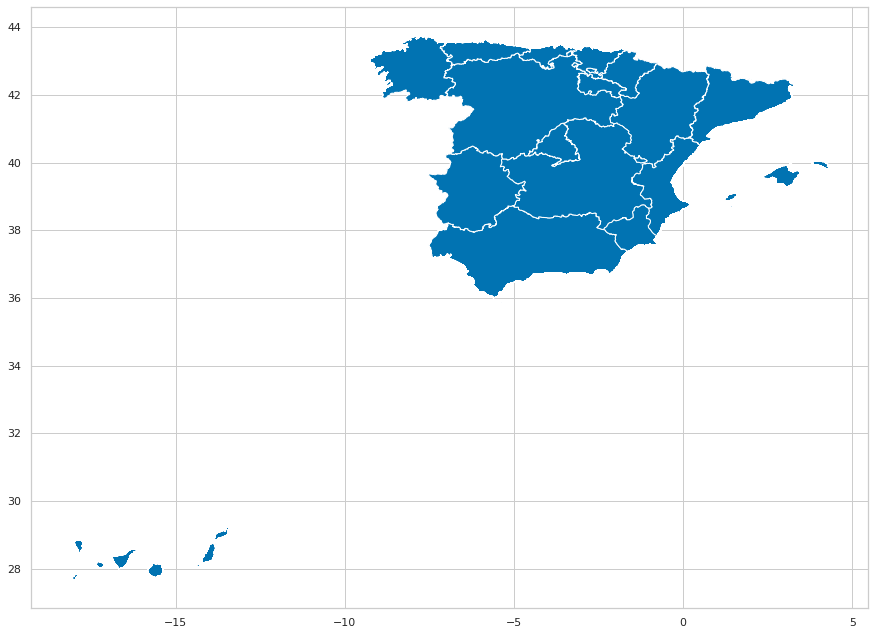

In [27]:
fig, ax = plt.subplots(figsize = (15, 15))
spain_map.plot(ax = ax)

In [28]:
# Define a coordinate reference system (CRS)
crs = {'init': 'espg:4326'}

### Plot Counts by Denominación de Origen

In [29]:
geo_count = [Point(xy) for xy in zip( df_geo_count_join['Longitude'], df_geo_count_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_count_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Geographical_Indication,Score,Latitude,Longitude,geometry
0,Castilla,9,39.866667,-4.016667,POINT (-4.01667 39.86667)
1,Castilla y León,6,41.383333,-4.450000,POINT (-4.45000 41.38333)
2,Cadiz,4,36.500000,-5.750000,POINT (-5.75000 36.50000)
3,Mallorca,3,39.616667,2.983333,POINT (2.98333 39.61667)
4,Catalonia,1,41.816667,1.466667,POINT (1.46667 41.81667)


Text(0.5, 1, 'Count of Wine Spectator Scores for Spanish Table Wines by Denominación de Origen')

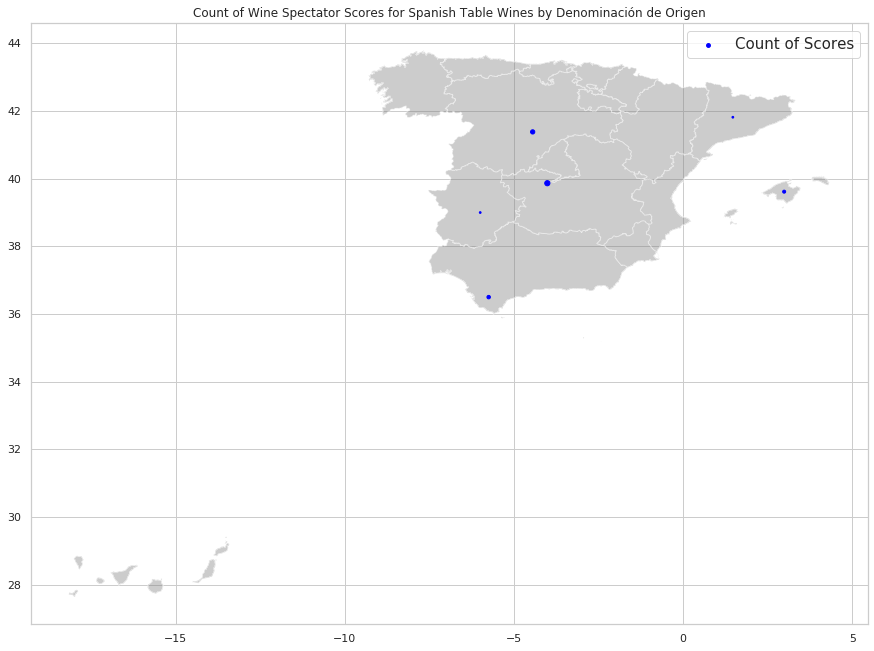

In [30]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'blue', marker = 'o', label = 'Count of Scores')
plt.legend(prop={'size': 15})
plt.title('Count of Wine Spectator Scores for Spanish Table Wines by Denominación de Origen')

### Plot mean *Wine Spectator Score* by Denominación de Origen

In [31]:
geo_count = [Point(xy) for xy in zip( df_geo_mean_score_join['Longitude'], df_geo_mean_score_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_mean_score_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Geographical_Indication,Score,Latitude,Longitude,geometry
0,Cadiz,90.500000,36.500000,-5.750000,POINT (-5.75000 36.50000)
1,Mallorca,89.666667,39.616667,2.983333,POINT (2.98333 39.61667)
2,Castilla y León,88.500000,41.383333,-4.450000,POINT (-4.45000 41.38333)
3,Catalonia,88.000000,41.816667,1.466667,POINT (1.46667 41.81667)
4,Extremadura,88.000000,39.000000,-6.000000,POINT (-6.00000 39.00000)


Text(0.5, 1, 'Mean Wine Spectator Score for Spanish Table Wines by Denominación de Origen')

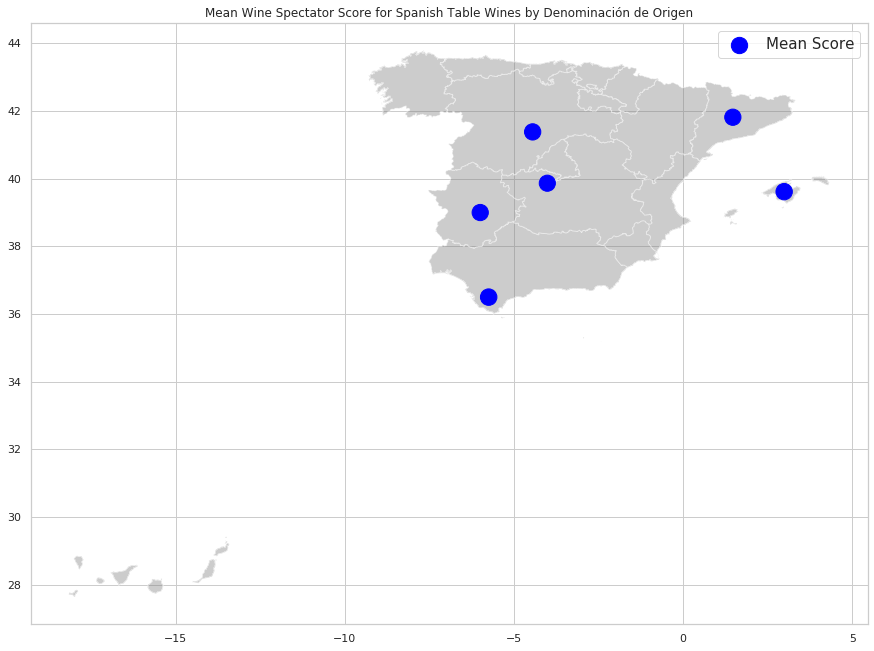

In [32]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'blue', marker = 'o', label = 'Mean Score')
plt.legend(prop={'size': 15})
plt.title('Mean Wine Spectator Score for Spanish Table Wines by Denominación de Origen')

### Plot mean Wine Price by Denominación de Origen

In [33]:
geo_count = [Point(xy) for xy in zip( df_geo_mean_price_join['Longitude'], df_geo_mean_price_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_mean_price_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Geographical_Indication,Price,Latitude,Longitude,geometry
0,Castilla y León,34.333333,41.383333,-4.450000,POINT (-4.45000 41.38333)
1,Mallorca,34.333333,39.616667,2.983333,POINT (2.98333 39.61667)
2,Cadiz,33.250000,36.500000,-5.750000,POINT (-5.75000 36.50000)
3,Extremadura,20.000000,39.000000,-6.000000,POINT (-6.00000 39.00000)
4,Castilla,16.222222,39.866667,-4.016667,POINT (-4.01667 39.86667)


Text(0.5, 1, 'Mean Wine Price for Spanish Table Wines by Denominación de Origen')

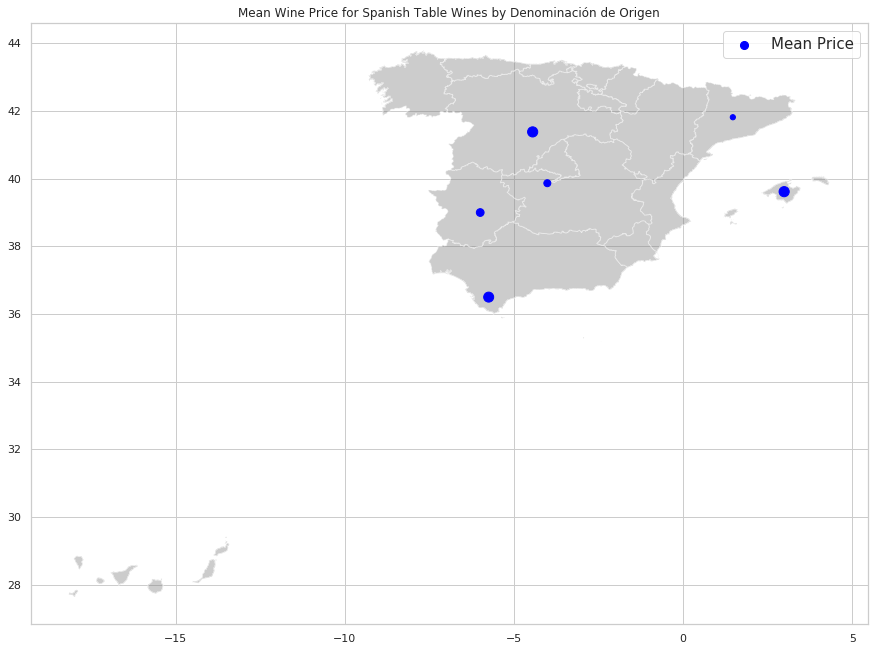

In [34]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Price'] * 3, color = 'blue', marker = 'o', label = 'Mean Price')
plt.legend(prop={'size': 15})
plt.title('Mean Wine Price for Spanish Table Wines by Denominación de Origen')